## Importing Required Libraries for Data Analysis and Model Building

In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

## Loading the Dataset

In [78]:

df = pd.read_csv('student-mat.csv', sep=';')


## Exploring the Dataset

In [79]:
df.shape

(395, 33)

In [80]:
df.size

13035

In [81]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [83]:
df.head(50)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## Checking for Missing Values in the Dataset

In [84]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Checking and Displaying Duplicate Rows in the Dataset

In [85]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


## Statistical Summary of the Dataset

In [86]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Correlation of Features with Final Grade (G3)

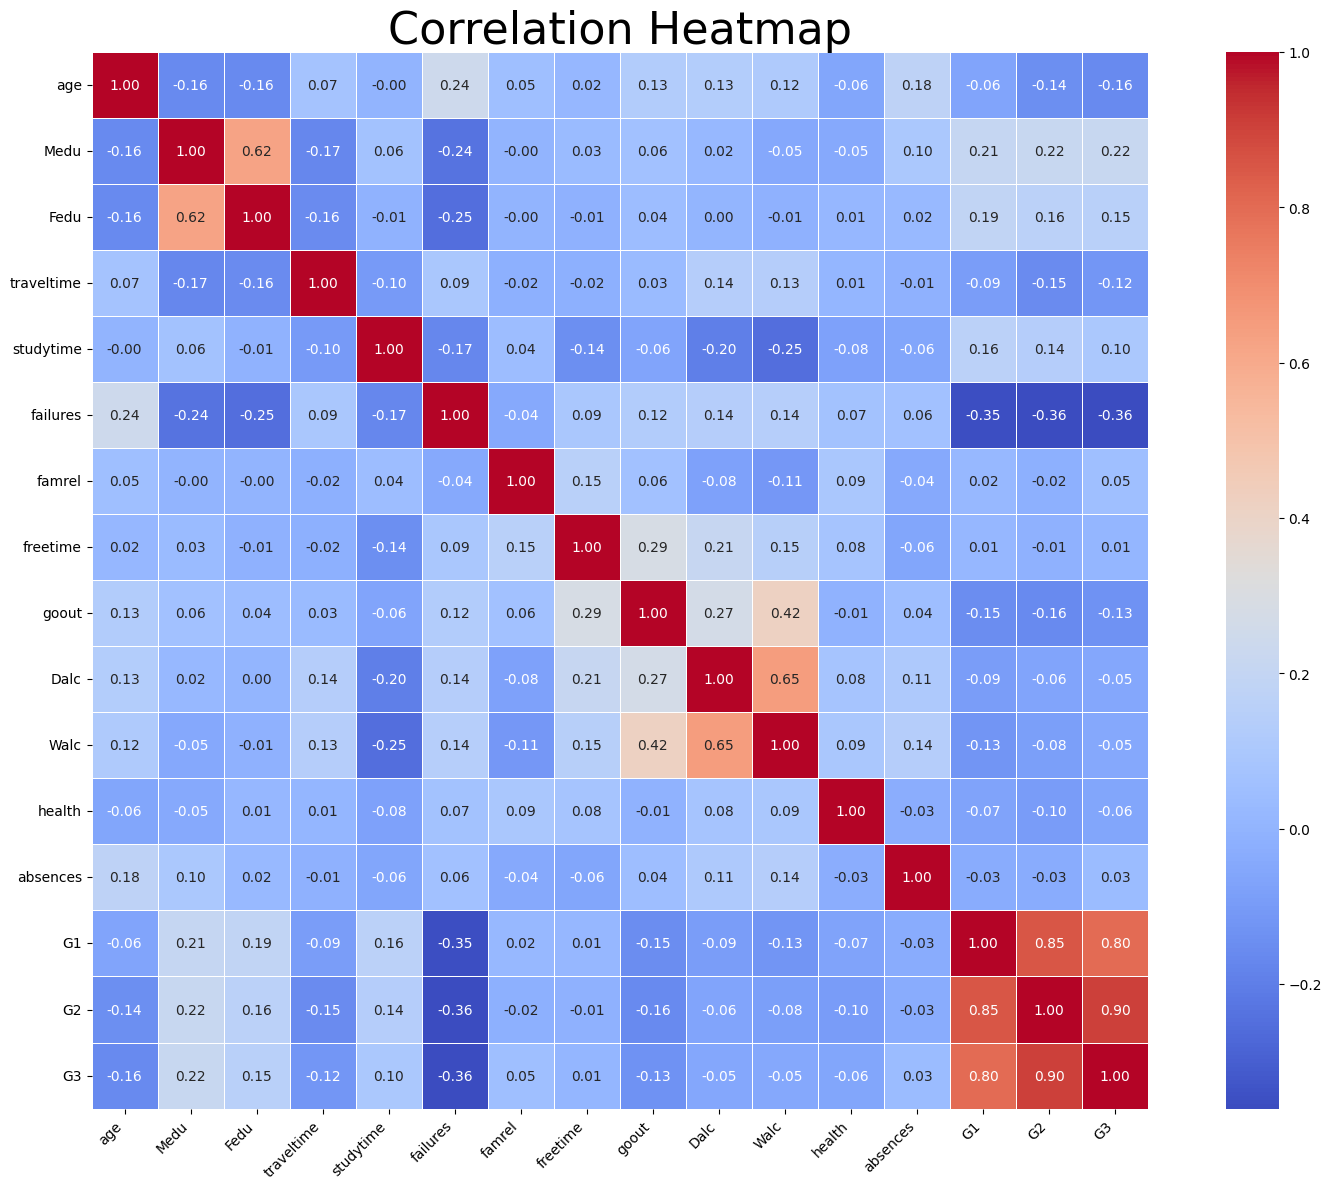

In [87]:
plt.figure(figsize=(16, 12)) 
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",                
    cmap='coolwarm',           
    linewidths=0.5,            
    linecolor='white',        
    cbar=True,                
    square=True,          
    annot_kws={"size": 10}     
)

plt.title('Correlation Heatmap', fontsize=32)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)               
plt.tight_layout()
plt.show()


### Visualizing the Distribution of Final Grades (G3)

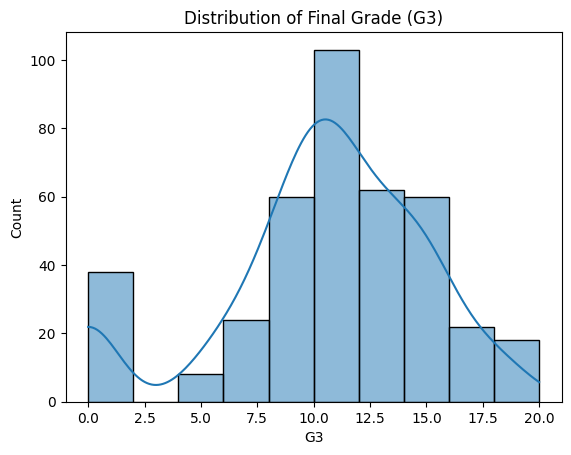

In [88]:
sns.histplot(df['G3'], bins=10, kde=True)
plt.title('Distribution of Final Grade (G3)')
plt.show()


### Converting Categorical Values to Numerical Values

In [89]:
school_encoding = {'GP': 0, 'MS': 1}
sex_encoding = {'F': 0, 'M': 1}
address_encoding = {'U': 0, 'R': 1}
famsize_encoding = {'GT3': 0, 'LE3': 1}
Pstatus_encoding = {'A': 0, 'T': 1}

Mjob_encoding = {
    'at_home': 0,
    'health': 1,
    'other': 2,
    'services': 3,
    'teacher': 4
}

Fjob_encoding = {
    'teacher': 0,
    'other': 1,
    'services': 2,
    'health': 3,
    'at_home': 4
}

reason_encoding = {
    'course': 0,
    'other': 1,
    'home': 2,
    'reputation': 3
}

guardian_encoding = {
    'mother': 0,
    'father': 1,
    'other': 2
}

schoolsup_encoding = {'yes': 1, 'no': 0}
famsup_encoding   = {'yes': 1, 'no': 0}
paid_encoding     = {'yes': 1, 'no': 0}
activities_encoding = {'yes': 1, 'no': 0}
nursery_encoding  = {'yes': 1, 'no': 0}
higher_encoding   = {'yes': 1, 'no': 0}
internet_encoding = {'yes': 1, 'no': 0}
romantic_encoding = {'yes': 1, 'no': 0}


### Mapping Categorical Values to Numerical Values

In [90]:
df['school']     = df['school'].map(school_encoding)
df['sex']        = df['sex'].map(sex_encoding)
df['address']    = df['address'].map(address_encoding)
df['famsize']    = df['famsize'].map(famsize_encoding)
df['Pstatus']    = df['Pstatus'].map(Pstatus_encoding)
df['Mjob']       = df['Mjob'].map(Mjob_encoding)
df['Fjob']       = df['Fjob'].map(Fjob_encoding)
df['reason']     = df['reason'].map(reason_encoding)
df['guardian']   = df['guardian'].map(guardian_encoding)
df['schoolsup']  = df['schoolsup'].map(schoolsup_encoding)
df['famsup']     = df['famsup'].map(famsup_encoding)
df['paid']       = df['paid'].map(paid_encoding)
df['activities'] = df['activities'].map(activities_encoding)
df['nursery']    = df['nursery'].map(nursery_encoding)
df['higher']     = df['higher'].map(higher_encoding)
df['internet']   = df['internet'].map(internet_encoding)
df['romantic']   = df['romantic'].map(romantic_encoding)


G2            0.904868
G1            0.801468
Medu          0.217147
higher        0.182465
Fedu          0.152457
sex           0.103456
Mjob          0.102082
paid          0.101996
reason        0.099773
internet      0.098483
studytime     0.097820
famsize       0.081407
nursery       0.051568
famrel        0.051363
absences      0.034247
activities    0.016100
freetime      0.011307
Fjob         -0.019246
famsup       -0.039157
school       -0.045017
Walc         -0.051939
guardian     -0.054193
Dalc         -0.054660
Pstatus      -0.058009
health       -0.061335
schoolsup    -0.082788
address      -0.105756
traveltime   -0.117142
romantic     -0.129970
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64


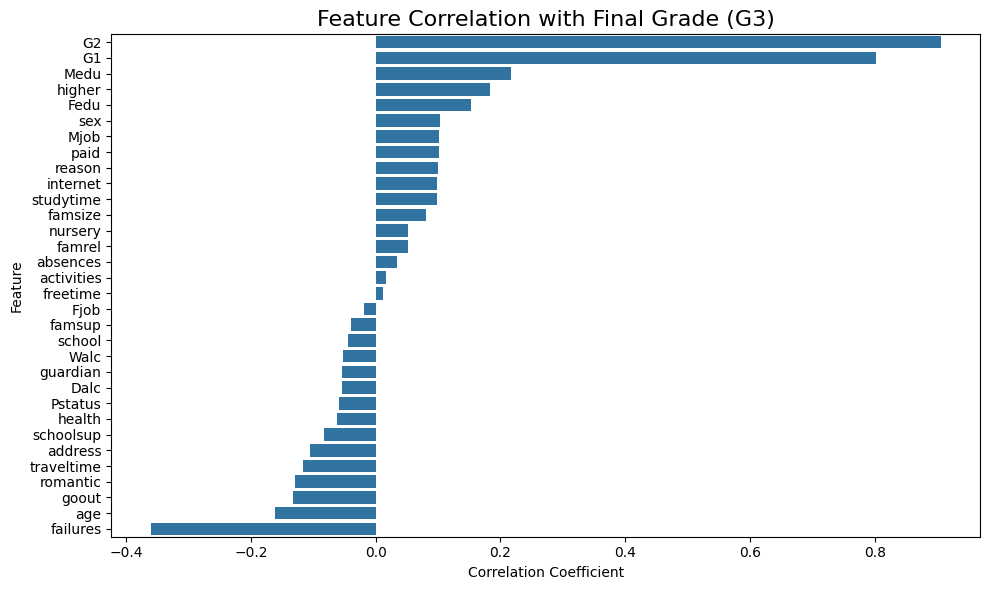

In [91]:
corr_with_g3 = df.corr(numeric_only=True)['G3'].drop('G3').sort_values(ascending=False)
print(corr_with_g3)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_g3.values, y=corr_with_g3.index)
plt.title('Feature Correlation with Final Grade (G3)', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


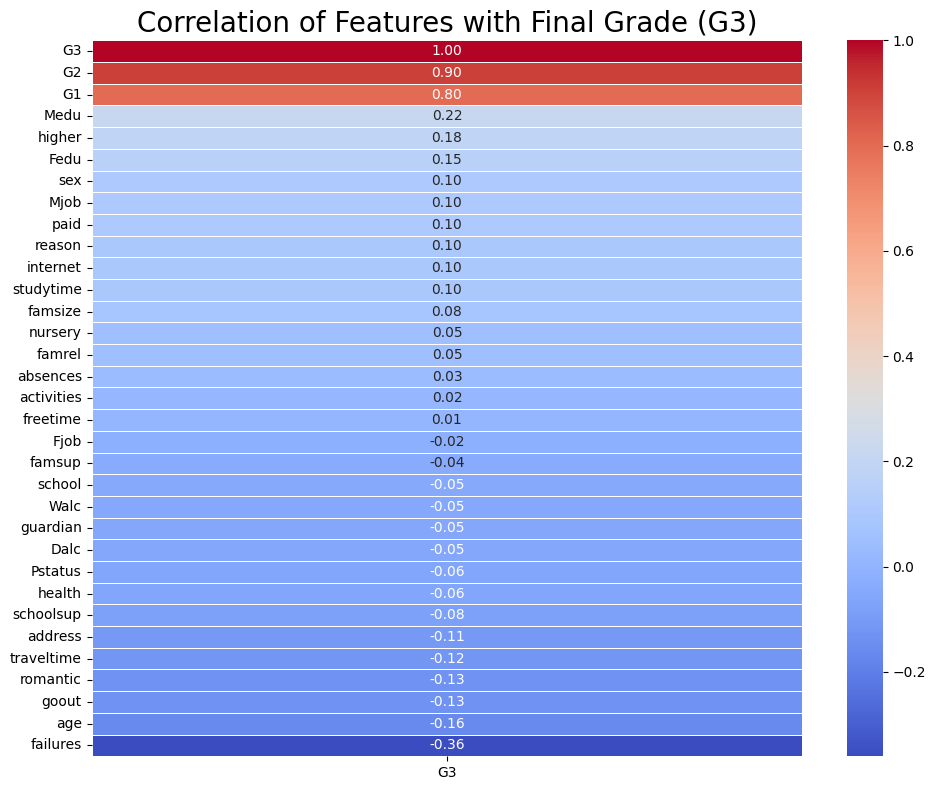

In [92]:
plt.figure(figsize=(10, 8))
g3_corr = df.corr(numeric_only=True)[['G3']].sort_values(by='G3', ascending=False)

sns.heatmap(
    g3_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white',
    annot_kws={"size": 10},
    cbar=True
)

plt.title('Correlation of Features with Final Grade (G3)', fontsize=20)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Visualizing Feature Distributions Using Boxplots

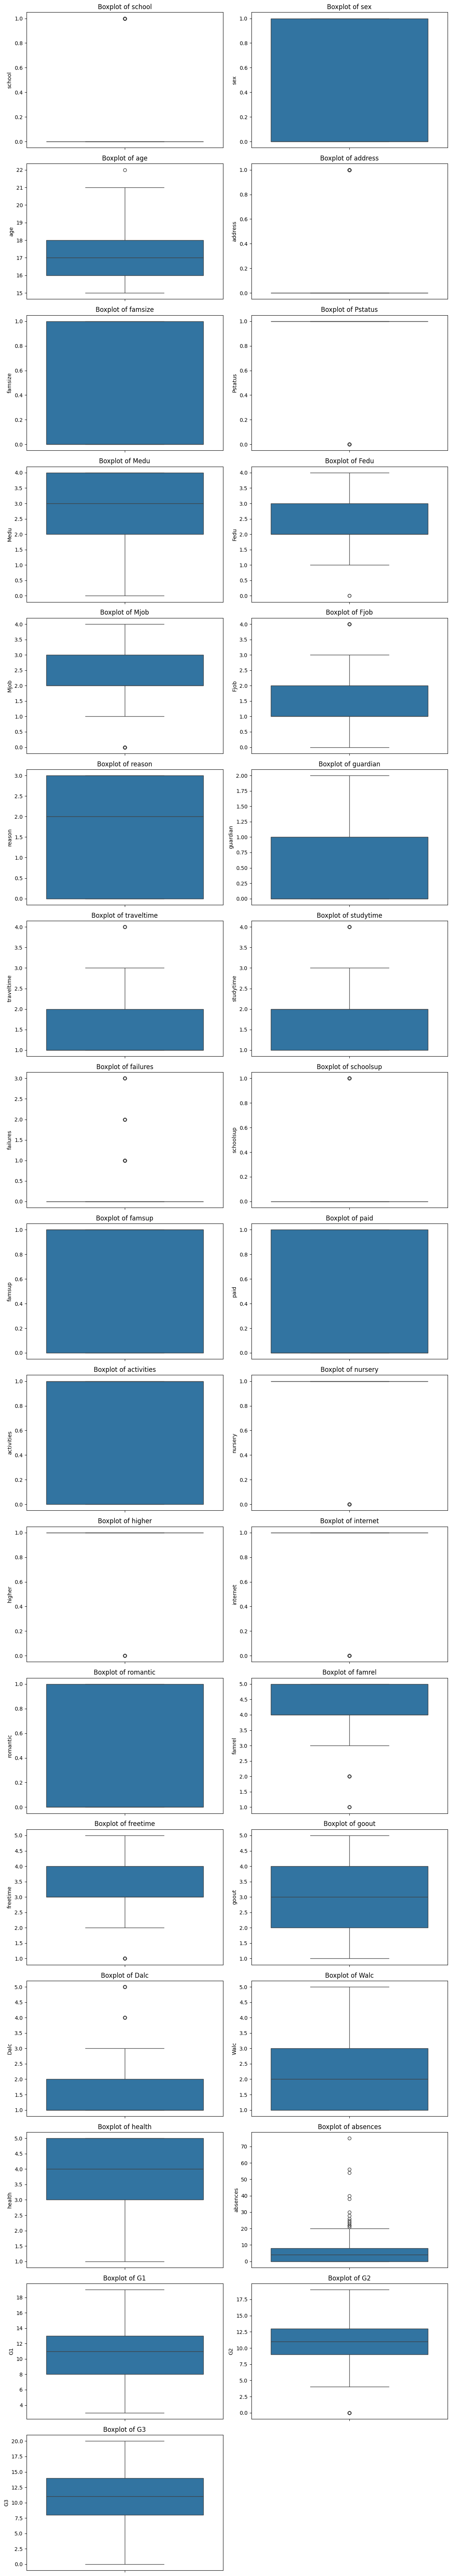

In [93]:
num_features = len(df.columns)
cols = 2  
rows = math.ceil(num_features / cols)

plt.figure(figsize=(cols * 6, rows * 4))
for i, column in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}', fontsize=12)

plt.tight_layout()
plt.show()


## Cleaning Outliers Using IQR Method

In [94]:
clean_data = df.copy()

for column in clean_data.columns:
    Q1 = clean_data[column].quantile(0.25)
    Q3 = clean_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    clean_data[column] = np.where(
        (clean_data[column] < lower_bound) | (clean_data[column] > upper_bound),
        np.nan,
        clean_data[column]
    )

clean_data.dropna(inplace=True)


## Boxplot Visualization of All Features (Outlier Detection)

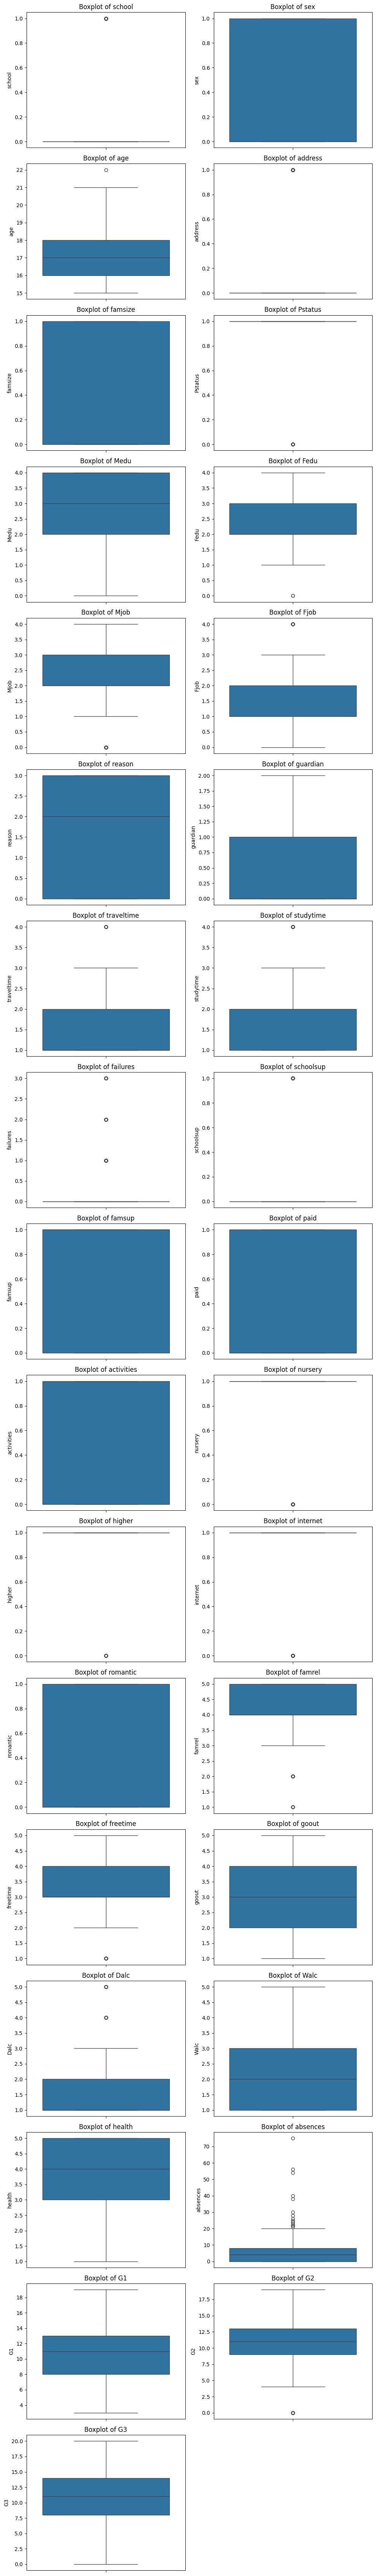

In [95]:
num_features = len(df.columns)
cols = 2  
rows = math.ceil(num_features / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, column in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}', fontsize=12)

plt.tight_layout()
plt.show()


In [96]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Converting Final Grade (G3) to Pass(1)/Fail Format(0)

In [97]:

df['G3'] = pd.to_numeric(df['G3'], errors='coerce')

df['result'] = df['G3'].apply(lambda x: 1 if x >= 4 else 0)
df['G3'] = df['result']

In [98]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,result
0,0,0,18,0,0,0,4,4,0,0,...,3,4,1,1,3,6,5,6,1,1
1,0,0,17,0,0,1,1,1,0,1,...,3,3,1,1,3,4,5,5,1,1
2,0,0,15,0,1,1,1,1,0,1,...,3,2,2,3,3,10,7,8,1,1
3,0,0,15,0,0,1,4,2,1,2,...,2,2,1,1,5,2,15,14,1,1
4,0,0,16,0,0,1,3,3,2,1,...,3,2,1,2,5,4,6,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,1,0,2,2,3,2,...,5,4,4,5,4,11,9,9,1,1
391,1,1,17,0,1,1,3,1,3,2,...,4,5,3,4,2,3,14,16,1,1
392,1,1,21,1,0,1,1,1,2,1,...,5,3,3,3,3,3,10,8,1,1
393,1,1,18,1,1,1,3,2,3,1,...,4,1,3,4,5,0,11,12,1,1


In [99]:
df = df.apply(pd.to_numeric, errors='coerce')


## Selecting Features and Target

In [100]:
X = df[['studytime',
       'failures','absences', 'G1', 'G2']]
y = df['G3']


In [101]:
X

,studytime,failures,absences,G1,G2
0,2,0,6,5,6
1,2,0,4,5,5
2,2,3,10,7,8
3,3,0,2,15,14
4,2,0,4,6,10
...,...,...,...,...,...
390,2,2,11,9,9
391,1,0,3,14,16
392,1,3,3,10,8
393,1,0,0,11,12


In [102]:
y

0      1
1      1
2      1
3      1
4      1
      ..
390    1
391    1
392    1
393    1
394    1
Name: G3, Length: 395, dtype: int64

## Split Data into Train and Test Sets

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Training XGBoost with a Starting Score (Base Score)

In [111]:
model = XGBClassifier(random_state=42, base_score=0.5)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [110]:
y_pred = model.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

print("\n Actual vs Predicted Comparison:")
print(comparison_df.head(60))  


 Accuracy: 0.9620253164556962

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.96      1.00      0.98        71

    accuracy                           0.96        79
   macro avg       0.98      0.81      0.87        79
weighted avg       0.96      0.96      0.96        79


 Actual vs Predicted Comparison:
    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        1          1
4        1          1
5        1          1
6        1          1
7        1          1
8        1          1
9        1          1
10       1          1
11       1          1
12       1          1
13       1          1
14       1          1
15       1          1
16       1          1
17       1          1
18       1          1
19       1          1
20       1          1
21       1          1
22       1          1
23       1          1
24       1          1
25       1 

## Saving the Trained XGBoost Model Using Pickle

In [107]:
with open('xgb_model2.pkl', 'wb') as file:
    pickle.dump(model, file)
